# FRONT FRANCE

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

import random 

import matplotlib.pyplot as plt
from matplotlib import colors
import mplcursors
import matplotlib.colors as mcolors

In [3]:
# DATABES SQLITE
import sqlite3
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table, update, select
db_path = '../DATA/HistoPlotik.db'

In [4]:
# Connect to the SQLite database (replace 'your_database.db' with your actual database file)
connection = sqlite3.connect(db_path)

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", connection)
for table in tables['name']:
    print (table)

# Close the database connection
connection.close()

XGBoost_reg200_resultats_tbl
XGBoost_reg200_importance_tbl
y_resultats200_tbl
X_col_titr
data_tbl
LGB_reg200_importance_tbl
LGB_reg200_resultats_tbl
villes_tbl


### LIST DES INFOS DISPO POUR FAIRE DES GRAPHIQUES

In [10]:
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the SQL query for the join
sql_query = f"""
SELECT 
    D.*
FROM 
    data_tbl D
;
"""

# Execute the SQL query and fetch the result into a DataFrame
df = pd.read_sql_query(sql_query, connection)

# Display the result DataFrame
df.shape

(33803, 273)

In [11]:
## TEST  GEO_latitude / GEO_longitude / YYY_pvoixENS
df_map=df[['GEO_latitude','GEO_longitude','YYY_pvoixENS']]

In [12]:
df_map['YYY_pvoixENS'].min(),df_map['YYY_pvoixENS'].max()

(0.0, 0.78260869)

In [13]:
df_map.columns

Index(['GEO_latitude', 'GEO_longitude', 'YYY_pvoixENS'], dtype='object')

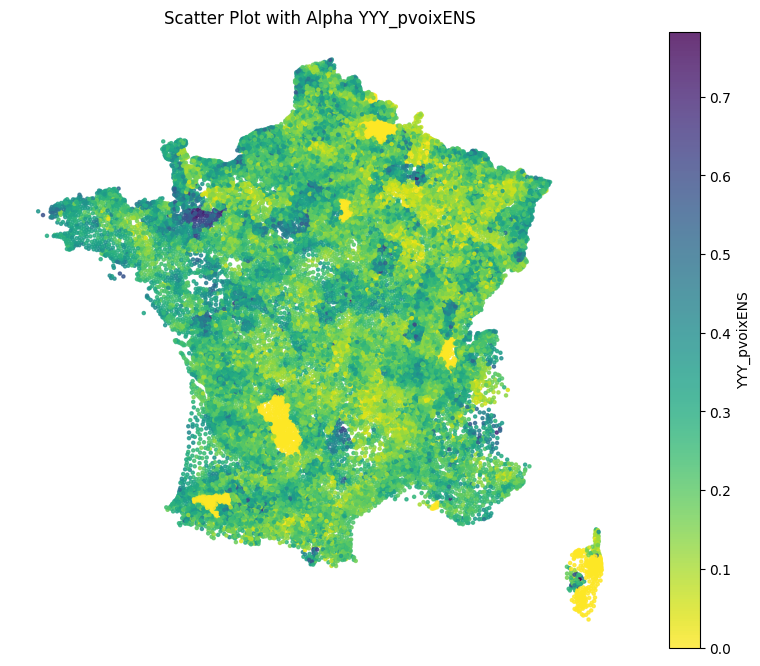

In [14]:
# Scatter plot
plt.figure(figsize=(10, 8))
# Normalize values between 0 and 1

norm = colors.Normalize(df['YYY_pvoixENS'].min(), df['YYY_pvoixENS'].max())

# Scatter plot with small points, alpha, and reversed color scale
scatter = plt.scatter(
    df['GEO_longitude'],
    df['GEO_latitude'],
    s=5,
    alpha=0.8,
    c=df['YYY_pvoixENS'],
    cmap='viridis_r',  # Reversed viridis colormap
    norm=norm
)

plt.colorbar(scatter, label='YYY_pvoixENS')

plt.axis('off')

# Set labels and title

plt.title('Scatter Plot with Alpha YYY_pvoixENS')

# Show the plot
plt.show()

In [156]:
def france_map (df,target, normalise=1) : 
    # Set the figure size
    plt.figure(figsize=(10, 8))

    # Scatter plot with small points, alpha, and reversed color scale
    scatter = plt.scatter(df['GEO_longitude'], df['GEO_latitude'], s=4, alpha=0.6, c=df[target], cmap='viridis', vmin=0, vmax=1)

    # Add colorbar
    cbar = plt.colorbar(scatter, label=target)

    # Hide the axes
    plt.axis('off')

    # Set title
    plt.title(target)

    # Configure mplcursors for hover information
    cursor = mplcursors.cursor(hover=True)

    @cursor.connect("add")
    def on_add(sel):
        x, y, idx = sel.target
        sel.annotation.set_text(f'{target}: {df[target].iloc[idx]:.2f}')

    # Set initial zoom levels
    initial_xlim = plt.xlim()
    initial_ylim = plt.ylim()

    def on_scroll(event):
        # Zoom factor
        zoom_factor = 1.2

        # Get current axis limits
        xlim = plt.xlim()
        ylim = plt.ylim()

        # Adjust limits based on scroll direction
        if event.button == 'up':
            xlim = [x / zoom_factor for x in xlim]
            ylim = [y / zoom_factor for y in ylim]
        elif event.button == 'down':
            xlim = [x * zoom_factor for x in xlim]
            ylim = [y * zoom_factor for y in ylim]

        # Update limits
        plt.xlim(xlim)
        plt.ylim(ylim)

    # Connect the scroll event to the on_scroll function
    plt.connect('scroll_event', on_scroll)

    # Show the plot
    plt.show()
    

In [157]:
def france_map0 (df,target, normalise=1, gradiants = 'viridis' ) : 
    # Set the figure size
    plt.figure(figsize=(10, 8))

    # Normalize 'YYY_pvoixENS' values to be in the range [0, 1]
    if normalise == 1 :
        norm = mcolors.Normalize(vmin=df[target].min(), vmax=df[target].max())
        normalized_values = norm(df[target])
    else : 
        normalized_values = df[target]

    # Set the figure size
    plt.figure(figsize=(10, 8))

    # Scatter plot with small points, alpha, and reversed color scale
    scatter = plt.scatter(df['GEO_longitude'], df['GEO_latitude'], s=3, alpha=0.4, c=normalized_values, cmap=gradiants)

    # Add colorbar
    cbar = plt.colorbar(scatter, label=target)

    # Hide the axes
    plt.axis('off')

    # Set title
    plt.title('Scatter Plot with Small Points, Alpha, Normalized Color Scale, and Color Legend (No Axes)')

    # Show the plot
    plt.show()
    

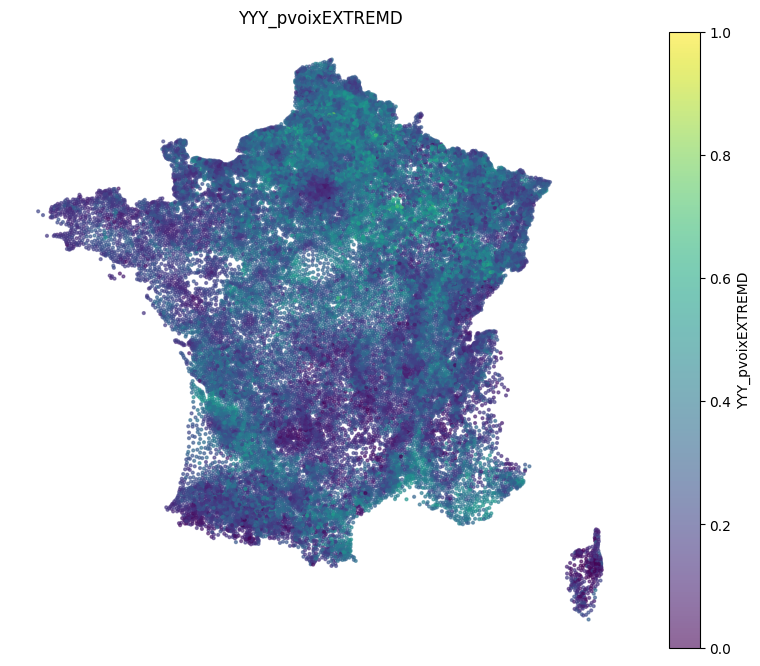

In [158]:
france_map (df,'YYY_pvoixEXTREMD')

<Figure size 1000x800 with 0 Axes>

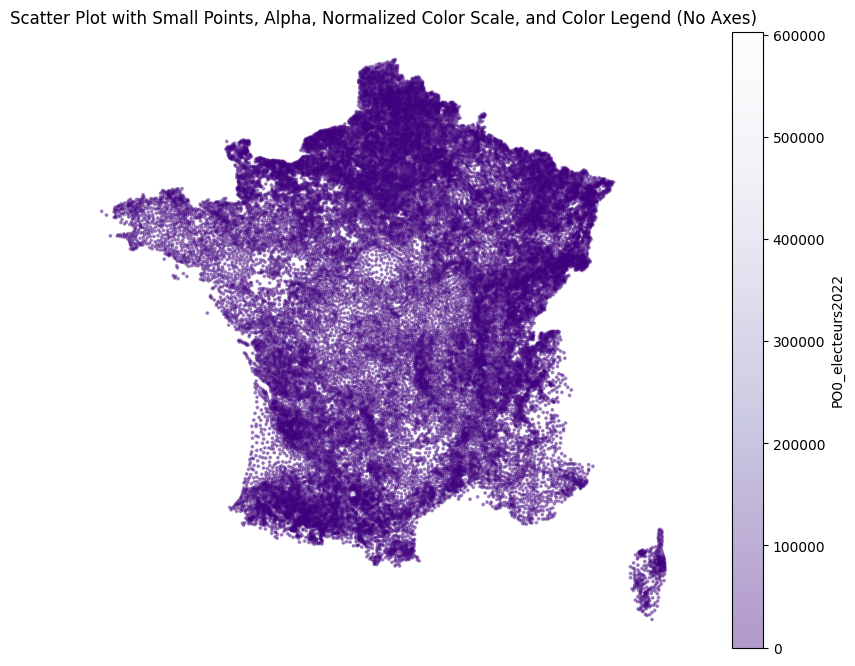

In [159]:
france_map0(df,'PO0_electeurs2022', normalise=2 , gradiants='Purples_r')

<Figure size 1000x800 with 0 Axes>

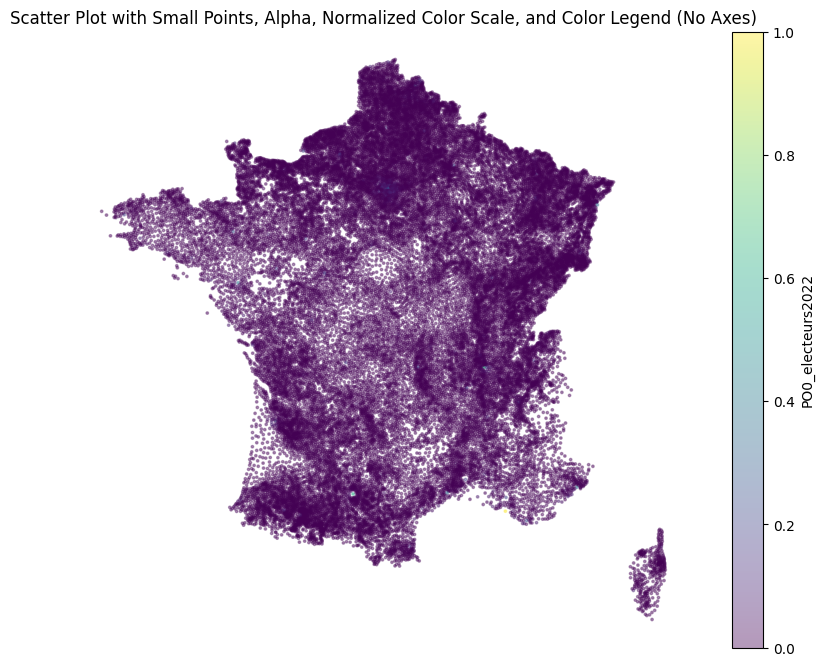

In [160]:
france_map0(df,'PO0_electeurs2022' )

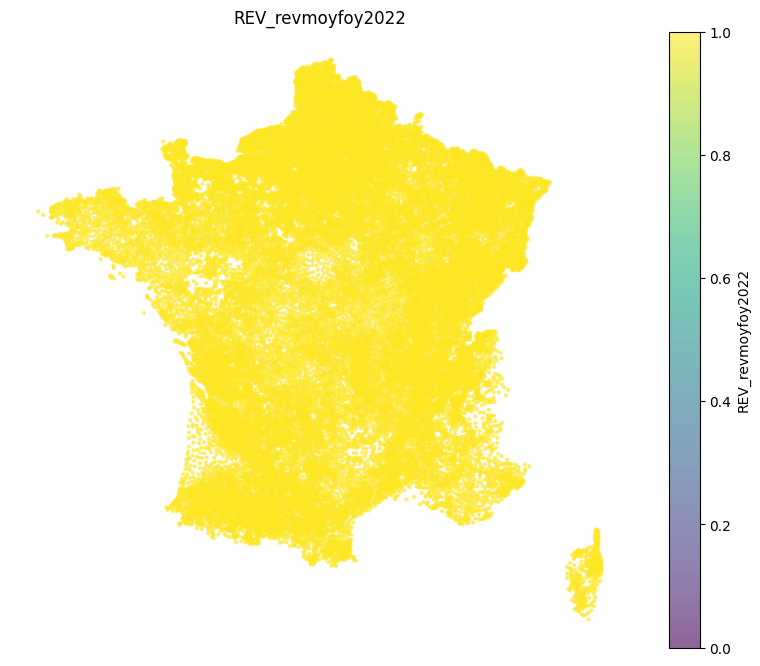

In [68]:
france_map (df,'REV_revmoyfoy2022')

### TESTS HITO DIPLOMES NON FINALISE 

In [132]:
# Assuming df is your DataFrame with the mentioned columns
# Example DataFrame creation

# Extract relevant columns for the histograms
bach_columns = [df['DIP_bach1992'].mean(), df['DIP_bach2002'].mean(), df['DIP_bach2012'].mean(), df['DIP_bach2017'].mean(), df['DIP_bach2022'].mean()]
bacf_columns = [df['DIP_bacf1992'].mean(), df['DIP_bacf2002'].mean(), df['DIP_bacf2012'].mean(), df['DIP_bacf2017'].mean(), df['DIP_bacf2022'].mean()]

bach_columns,bacf_columns

([70.0, 75.0, 80.0, 85.0, 90.0], [65.0, 70.0, 75.0, 80.0, 85.0])

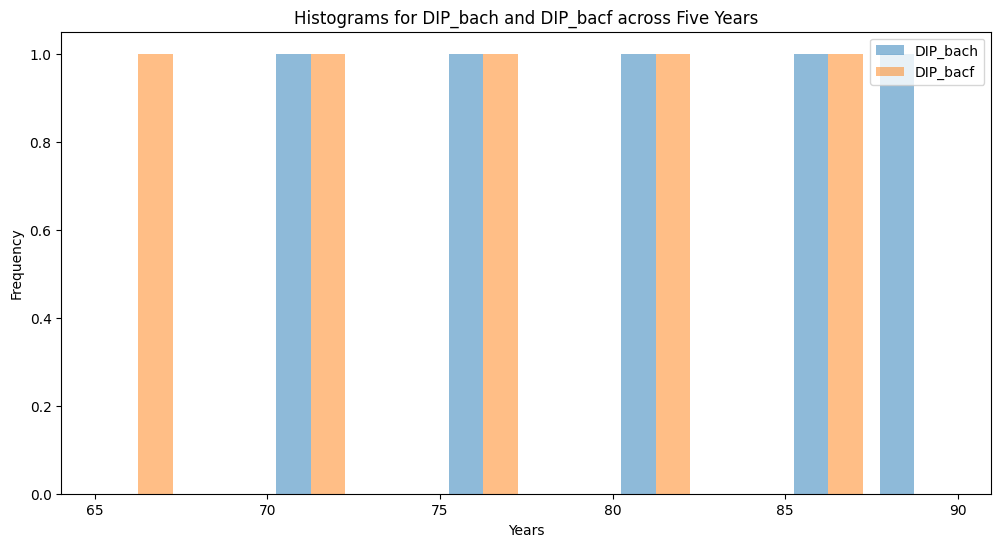

In [135]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histograms for 'DIP_bach' and 'DIP_bacf'
plt.hist([bach_means, bacf_means], bins=10, alpha=0.5, label=['DIP_bach', 'DIP_bacf'])

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Histograms for DIP_bach and DIP_bacf across Five Years')

# Set x-axis ticks and labels
# plt.xticks(range(len(bach_means)), [1, 2, 3, 4, 5])

# Add legend
plt.legend()